In [15]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('ce889_dataCollection.csv', header=None, names=['X_dist', 'Y_dist', 'Vx', 'Vy'])
print(data.head())  # 打印前几行查看数据


       X_dist  Y_dist   Vx    Vy
0  433.741688   431.9  0.0  0.00
1  433.741688   431.9 -0.1  0.04
2  433.701688   432.0 -0.2  0.00
3  433.701688   432.2 -0.3  0.04
4  433.661688   432.5 -0.4  0.00


In [16]:
# 检查缺失值
print(data.isnull().sum())

X_dist    0
Y_dist    0
Vx        0
Vy        0
dtype: int64


数据预览:
       X_dist  Y_dist   Vx    Vy
0  433.741688   431.9  0.0  0.00
1  433.741688   431.9 -0.1  0.04
2  433.701688   432.0 -0.2  0.00
3  433.701688   432.2 -0.3  0.04
4  433.661688   432.5 -0.4  0.00

缺失值检查:
X_dist    0
Y_dist    0
Vx        0
Vy        0
dtype: int64

描述性统计:
            X_dist       Y_dist           Vx           Vy
count  2139.000000  2139.000000  2139.000000  2139.000000
mean    -66.273891   393.748782     2.224537    -0.924124
std     196.875671   153.416694     3.303334     2.399424
min    -512.372672    66.230123    -4.218313    -5.554459
25%    -150.577076   317.324010    -0.728522    -2.788074
50%     -61.832634   406.605451     1.782303    -0.818255
75%      36.795120   447.088586     5.133541     0.040918
max     433.741688   814.170038     7.979459     6.740827


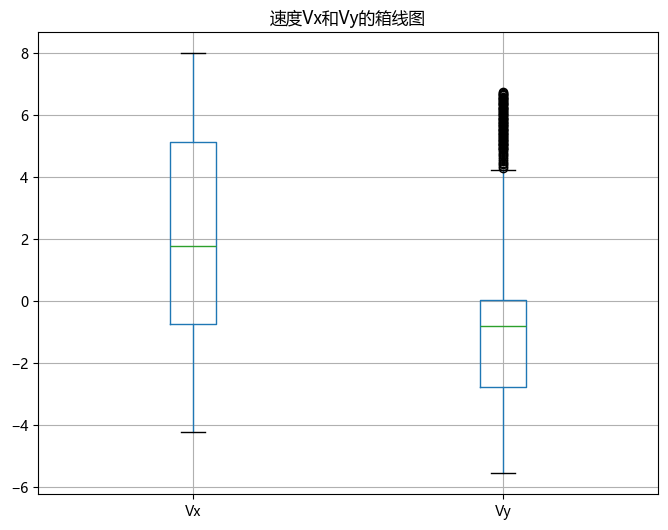

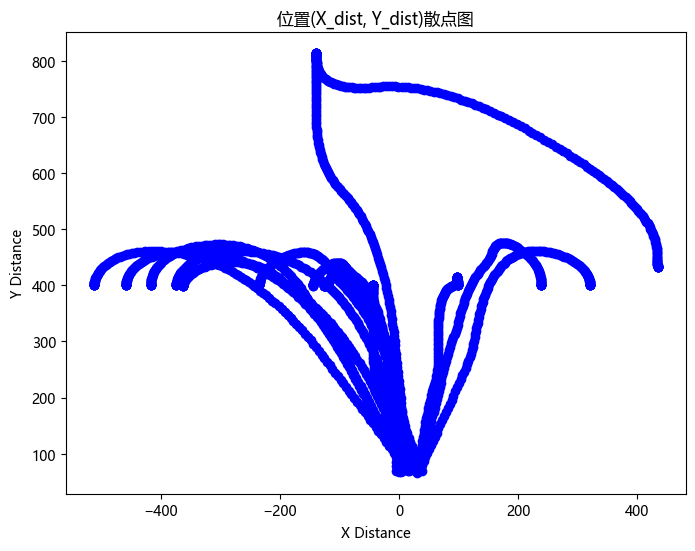


裁剪后的数据预览:
       X_dist  Y_dist   Vx    Vy
0  433.741688   431.9  0.0  0.00
1  433.741688   431.9 -0.1  0.04
2  433.701688   432.0 -0.2  0.00
3  433.701688   432.2 -0.3  0.04
4  433.661688   432.5 -0.4  0.00

归一化后的数据预览:
     X_dist    Y_dist        Vx        Vy
0  1.000000  0.488903  0.345827  0.451755
1  1.000000  0.488903  0.337628  0.455008
2  0.999958  0.489036  0.329430  0.451755
3  0.999958  0.489304  0.321232  0.455008
4  0.999915  0.489705  0.313034  0.451755

训练集和测试集的大小:
X_train: (1711, 4), X_test: (428, 4)
y_train: (1711, 2), y_test: (428, 2)


In [18]:
from matplotlib import rcParams
# 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# 设置字体为 SimHei（支持中文）

# 2. 读取CSV文件
data = pd.read_csv('ce889_dataCollection.csv', header=None, names=['X_dist', 'Y_dist', 'Vx', 'Vy'])
print("数据预览:")
print(data.head())  # 打印前几行查看数据

# 3. 检查是否有缺失值
print("\n缺失值检查:")
print(data.isnull().sum())  # 检查缺失值

# 4. 描述性统计分析
print("\n描述性统计:")
print(data.describe())  # 查看数据的统计信息

rcParams['font.family'] = ['Microsoft YaHei']

# 5. 数据可视化：速度分布的箱线图
plt.figure(figsize=(8, 6))
data[['Vx', 'Vy']].boxplot()
plt.title("速度Vx和Vy的箱线图")
plt.show()

# 6. 数据可视化：位置分布的散点图
plt.figure(figsize=(8, 6))
plt.scatter(data['X_dist'], data['Y_dist'], c='blue', label='Position')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.title('位置(X_dist, Y_dist)散点图')
plt.show()

# 7. 异常值处理：限制速度值的范围
# 假设速度超过10的值为异常值，进行裁剪
threshold = 10
data[['Vx', 'Vy']] = data[['Vx', 'Vy']].clip(upper=threshold)

print("\n裁剪后的数据预览:")
print(data.head())

# 8. 归一化数据：将所有数据缩放到0-1之间
scaler = MinMaxScaler()
data[['X_dist', 'Y_dist', 'Vx', 'Vy']] = scaler.fit_transform(data[['X_dist', 'Y_dist', 'Vx', 'Vy']])

print("\n归一化后的数据预览:")
print(data.head())  # 查看归一化后的数据

# 9. 数据分割：分为训练集和测试集
from sklearn.model_selection import train_test_split

# 特征（X）和目标（y）
X = data[['X_dist', 'Y_dist', 'Vx', 'Vy']]  # 输入特征
y = data[['X_dist', 'Y_dist']]  # 输出目标

# 将数据分为训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n训练集和测试集的大小:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
